# 实证

## 调用stata

In [1]:
import sys
sys.path.append(r'D:\stata\utilities')  # Stata17的pystata包的安装位置
from pystata import config
config.init('mp')


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 8-core , expiring  1 Jan 2025
Serial number: 501709301094
  Licensed to: Benci
               zufe

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.

Running c:\ado\plus\profile.do ...
command window is unrecognized
r(199);


In [18]:
%%stata
use "F:\Data\1210回归数据.dta", clear

In [19]:
%%stata
sum


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
          id |     28,681      291460    269598.6          2     688679
        zqid |          0
        year |     28,681    2016.519    3.103041       2011       2021
        name |          0
       start |     28,681    2006.193    7.548837       1990       2020
-------------+---------------------------------------------------------
         gap |     28,681    10.32621    7.497819          0         31
       build |          0
        core |     28,681    .4054949    .4909961          0          1
   indusname |          0
     indusid |          0
-------------+---------------------------------------------------------
  province_x |          0
        city |          0
       total |     28,655    6091.206    20337.91          2     552810
          js |     27,964    1201.324    6515.098          1     344243
          sc |     24,746

      rencai |     28,289    433.7176    326.7786   23.83916   1294.259
      _merge |     28,681    2.976151    .2170944          1          3
          rc |     28,289    .0433718    .0326779   .0023839   .1294259
-------------+---------------------------------------------------------
     _est_m1 |     28,681    .9223528    .2676203          0          1
     _est_m2 |     28,681    .9188661    .2730453          0          1
     _est_m3 |     28,681    .9245145    .2641778          0          1
     _est_m4 |     28,681    .9210627    .2696455          0          1


## 缩尾

In [20]:
%%stata
winsor2 info TAT,cuts(1 99) replace

### 回归

In [35]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info,absorb(id year) cluster(ctid)

(dropped 100 singleton observations)
(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =     26,354
Absorbing 2 HDFE groups                           F(  13,    239) =       4.15
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8486
                                                  Adj R-squared   =     0.8289
                                                  Within R-sq.    =     0.0235
Number of clusters (ctid)    =        240         Root MSE        =     0.4855

                                 (Std. err. adjusted for 240 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did 

### 描述性统计

In [27]:
%%stata
gen samp=e(sample)

In [28]:
%%stata
tabstat hl2 hl3 did SIZE LEV ROE GROWTH TOP1 CFO2 TobinQ3 TAT lnpgdp rev fin info if samp==1,s(N mean sd min p50 max) f(%12.3f) c(s)


    Variable |            N         Mean           SD          Min          p50
-------------+-----------------------------------------------------------------
         hl2 |    26354.000        0.674        1.174        0.000        0.284
         hl3 |    26354.000        0.039        0.066        0.000        0.015
         did |    26354.000        0.560        0.496        0.000        1.000
      lnpgdp |    26354.000        4.965        0.218        4.358        4.997
         rev |    26354.000        1.547        0.724        0.914        1.291
         fin |    26354.000        0.209        0.038        0.128        0.207
        info |    26354.000        0.022        0.014        0.000        0.020
        SIZE |    26354.000       22.277        1.309       19.878       22.088
         LEV |    26354.000        0.430        0.205        0.053        0.423
         ROE |    26354.000        0.057        0.133       -0.718        0.068
      GROWTH |    26354.000        0.17

In [37]:
%%stata
logout , save(D:\mytable4) word replace : tabstat hl2 did SIZE LEV ROE GROWTH TOP1 CFO2 TobinQ3 TAT lnpgdp rev fin info if samp==1,s(N mean sd min p50 max) f(%12.3f) c(s)


    Variable |            N         Mean           SD          Min          p50
-------------+-----------------------------------------------------------------
         hl2 |    26354.000        0.674        1.174        0.000        0.284
         did |    26354.000        0.560        0.496        0.000        1.000
        SIZE |    26354.000       22.277        1.309       19.878       22.088
         LEV |    26354.000        0.430        0.205        0.053        0.423
         ROE |    26354.000        0.057        0.133       -0.718        0.068
      GROWTH |    26354.000        0.174        0.416       -0.552        0.108
        TOP1 |    26354.000       34.314       14.870        8.570       32.085
        CFO2 |    26354.000        0.047        0.103      -10.216        0.046
     TobinQ3 |    26354.000        2.433        1.763        0.839        1.865
         TAT |    26354.000        0.617        0.417        0.069        0.524
      lnpgdp |    26354.000        4.96

### 平行趋势检验

In [45]:
%%stata
drop dyear
gen dyear = year - ssyear
ta dyear


. drop dyear

. gen dyear = year - ssyear
(7,579 missing values generated)

. ta dyear

      dyear |      Freq.     Percent        Cum.
------------+-----------------------------------
         -5 |        231        1.09        1.09
         -4 |        457        2.17        3.26
         -3 |      1,461        6.92       10.18
         -2 |      1,551        7.35       17.53
         -1 |      1,583        7.50       25.04
          0 |      1,689        8.00       33.04
          1 |      1,852        8.78       41.82
          2 |      2,014        9.54       51.36
          3 |      2,196       10.41       61.77
          4 |      2,229       10.56       72.33
          5 |      2,263       10.72       83.05
          6 |      1,949        9.24       92.29
          7 |      1,627        7.71      100.00
------------+-----------------------------------
      Total |     21,102      100.00

. 


In [40]:
%%stata
replace dyear = 5 if dyear > 5

(0 real changes made)


In [46]:
%%stata
drop pre* current post*

In [47]:
%%stata
forvalues i=5(-1)1{
    gen pre`i' = (dyear==-`i'&treat==1)
}

gen current=(dyear==0&treat==1)

forvalues i=1(1)7{
    gen post`i' = (dyear==`i'&treat==1)
}


. forvalues i=5(-1)1{
  2.     gen pre`i' = (dyear==-`i'&treat==1)
  3. }

. 
. gen current=(dyear==0&treat==1)

. 
. forvalues i=1(1)7{
  2.     gen post`i' = (dyear==`i'&treat==1)
  3. }

. 


In [48]:
%%stata
drop pre1

In [49]:
%%stata
reghdfe hl2 pre* current post* SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info,absorb(id year) cluster(ctid)

(dropped 100 singleton observations)


(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =     26,354
Absorbing 2 HDFE groups                           F(  24,    239) =       3.61
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8488
                                                  Adj R-squared   =     0.8290
                                                  Within R-sq.    =     0.0247
Number of clusters (ctid)    =        240         Root MSE        =     0.4853

                                 (Std. err. adjusted for 240 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        pre5 |  -.0589836   .0468754    -1.26   0.


. coefplot, baselevels ///
> keep(pre* current post*) ///
> vertical ///转置图形
> coeflabels(  ///
> pre5 = "-5" ///
> pre4 = "-4" ///
> pre3 = "-3" ///
> pre2 = "-2" ///
> current = "0" ///
> post1 = "1" ///
> post2 = "2" ///
> post3 = "3" ///
> post4 = "4" ///
> post5 = "5" ///
> post6 = "6" ///
> post7 = "7" ///
> ) ///
> yline(0,lcolor(edkblue*0.8)) ///加入y=0这条虚线
> ylabel(-0.2(0.02)0.2) ///
> xline(5, lwidth(vthin) lpattern(dash) lcolor(teal)) ///
> ylabel(,labsize(*0.75)) xlabel(,labsize(*0.75)) ///
> ytitle("政策动态经济效应",size(small)) ///加入Y轴标题,大小small
> xtitle("政策时点",size(small)) ///加入X轴标题,大小small
> addplot(line @b @at) ///增加点之间的连线
> ciopts(lpattern(dash) recast(rcap) msize(medium)) ///CI为虚线上下封口
> msymbol(circle hollow) ///plot空心格式
> scheme(s1mono)

. 


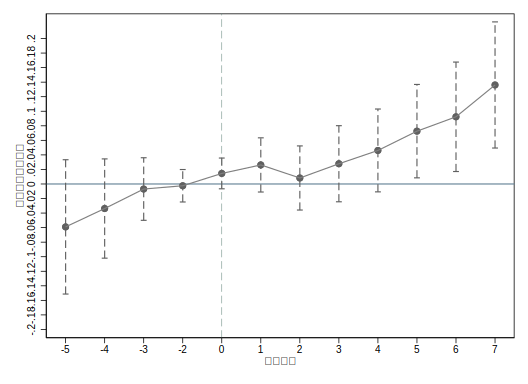

In [50]:
%%stata
coefplot, baselevels ///
keep(pre* current post*) ///
vertical ///转置图形
coeflabels(  ///
pre5 = "-5" ///
pre4 = "-4" ///
pre3 = "-3" ///
pre2 = "-2" ///
current = "0" ///
post1 = "1" ///
post2 = "2" ///
post3 = "3" ///
post4 = "4" ///
post5 = "5" ///
post6 = "6" ///
post7 = "7" ///
) ///
yline(0,lcolor(edkblue*0.8)) ///加入y=0这条虚线
ylabel(-0.2(0.02)0.2) ///
xline(5, lwidth(vthin) lpattern(dash) lcolor(teal)) ///
ylabel(,labsize(*0.75)) xlabel(,labsize(*0.75)) ///
ytitle("政策动态经济效应",size(small)) ///加入Y轴标题,大小small
xtitle("政策时点",size(small)) ///加入X轴标题,大小small
addplot(line @b @at) ///增加点之间的连线
ciopts(lpattern(dash) recast(rcap) msize(medium)) ///CI为虚线上下封口
msymbol(circle hollow) ///plot空心格式
scheme(s1mono)

## 稳健性检验

### 安慰剂检验

In [51]:
%%stata
save "F:\Data\vscode.dta"


file F:\Data\vscode.dta saved


In [52]:
%%stata
cd "F:\Data\1210实证"
permute did beta=_b[did] se=_se[did] dr=e(df_r), rep(500) seed(500) saving("安慰剂检验hl21210.dta"):reghdfe hl2 did GROWTH CFO1 ROE LEV SIZE TOP1 TobinQ3 TAT lnpgdp rev fin info ,absorb(id year) cluster(ctid)


. cd "F:\Data\1210实证"
F:\Data\1210实证

. permute did beta=_b[did] se=_se[did] dr=e(df_r), rep(500) seed(500) saving("
> 安慰剂检验hl21210.dta"):reghdfe hl2 did GROWTH CFO1 ROE LEV SIZE TOP1 TobinQ3
>  TAT lnpgdp rev fin info ,absorb(id year) cluster(ctid)
(running reghdfe on estimation sample)

Permutations (500): ..........10..........20..........30..........40..........5
> 0..........60..........70..........80..........90..........100..........110..
> ........120..........130..........140..........150..........160..........170.
> .........180..........190..........200..........210..........220..........230
> ..........240..........250..........260..........270..........280..........29
> 0..........300..........310..........320..........330..........340..........3
> 50..........360..........370..........380..........390..........400..........
> 410..........420..........430..........440..........450..........460.........
> .470..........480..........490..........500 done

Monte Carlo permu

In [53]:
%%stata
cd "F:\Data\1210实证"
use 安慰剂检验hl21210.dta ,clear
gen t_value=beta/se
gen p_value=2*ttail(dr,abs(beta/se))


. cd "F:\Data\1210实证"
F:\Data\1210实证

. use 安慰剂检验hl21210.dta ,clear
(permute did : reghdfe)

. gen t_value=beta/se

. gen p_value=2*ttail(dr,abs(beta/se))

. 


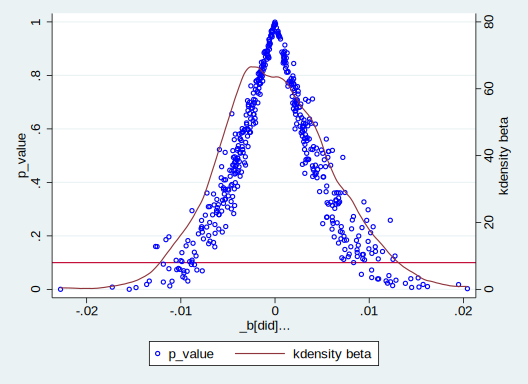

In [54]:
%%stata
twoway (scatter p_value beta,msymbol (smcircle_hollow) mcolor(blue)) (kdensity beta,yaxis(2)), xline(0.0374,lcolor(red) lp(dash)) yline(0.1)

### PSM

### ~~地方数字经济指数~~

In [15]:
%%stata
use "F:\Data\vscode.dta",clear

In [4]:
%%stata
drop _merge
merge m:1 ctid year using "F:\Data\数字经济.dta"


. drop _merge

. merge m:1 ctid year using "F:\Data\数字经济.dta"

    Result                      Number of obs
    -----------------------------------------
    Not matched                         1,054
        from master                       331  (_merge==1)
        from using                        723  (_merge==2)

    Matched                            28,350  (_merge==3)
    -----------------------------------------

. 


In [5]:
%%stata
drop if _merge == 2

(723 observations deleted)


In [8]:
%%stata
winsor2 shuzi1 shuzi2,cuts(1 99) replace

In [10]:
%%stata
reghdfe hl2 shuzi1 SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info,absorb(id year) cluster(ctid)

(dropped 100 singleton observations)


(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =     26,354
Absorbing 2 HDFE groups                           F(  13,    239) =       3.78
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8485
                                                  Adj R-squared   =     0.8289
                                                  Within R-sq.    =     0.0233
Number of clusters (ctid)    =        240         Root MSE        =     0.4855

                                 (Std. err. adjusted for 240 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      shuzi1 |   .9981145   1.940499     0.51   0.

### 平衡面板数据

In [11]:
%%stata
sum


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
          id |     28,681      291460    269598.6          2     688679
        zqid |          0
        year |     28,681    2016.519    3.103041       2011       2021
        name |          0
       start |     28,681    2006.193    7.548837       1990       2020
-------------+---------------------------------------------------------
         gap |     28,681    10.32621    7.497819          0         31
       build |          0
        core |     28,681    .4054949    .4909961          0          1
   indusname |          0
     indusid |          0
-------------+---------------------------------------------------------
  province_x |          0
        city |          0
       total |     28,655    6091.206    20337.91          2     552810
          js |     27,964    1201.324    6515.098          1     344243
          sc |     24,746

In [12]:
%%stata
drop if start > 2011

(7,077 observations deleted)


In [13]:
%%stata
tab year


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2011 |      1,964        9.09        9.09
       2012 |      1,964        9.09       18.18
       2013 |      1,964        9.09       27.27
       2014 |      1,964        9.09       36.36
       2015 |      1,964        9.09       45.45
       2016 |      1,964        9.09       54.55
       2017 |      1,964        9.09       63.64
       2018 |      1,964        9.09       72.73
       2019 |      1,964        9.09       81.82
       2020 |      1,964        9.09       90.91
       2021 |      1,964        9.09      100.00
------------+-----------------------------------
      Total |     21,604      100.00


In [14]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info,absorb(id year) cluster(ctid)

(MWFE estimator converged in 5 iterations)

HDFE Linear regression                            Number of obs   =     20,471
Absorbing 2 HDFE groups                           F(  13,    220) =       4.04
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8059
                                                  Adj R-squared   =     0.7853
                                                  Within R-sq.    =     0.0270
Number of clusters (ctid)    =        221         Root MSE        =     0.5010

                                 (Std. err. adjusted for 221 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did |    .043658   .0194061     2.25   0.

## 异质性分析

### 国企非国企

In [16]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info if SOE==1 ,absorb(id year) cluster(ctid)

(dropped 55 singleton observations)
(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =      9,960
Absorbing 2 HDFE groups                           F(  13,    186) =       2.24
Statistics robust to heteroskedasticity           Prob > F        =     0.0096
                                                  R-squared       =     0.8180
                                                  Adj R-squared   =     0.7948
                                                  Within R-sq.    =     0.0471
Number of clusters (ctid)    =        187         Root MSE        =     0.5311

                                 (Std. err. adjusted for 187 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did |

In [17]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info if SOE==0 ,absorb(id year) cluster(ctid)

(dropped 117 singleton observations)
(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =     16,322
Absorbing 2 HDFE groups                           F(  13,    199) =       3.17
Statistics robust to heteroskedasticity           Prob > F        =     0.0002
                                                  R-squared       =     0.8815
                                                  Adj R-squared   =     0.8638
                                                  Within R-sq.    =     0.0124
Number of clusters (ctid)    =        200         Root MSE        =     0.4335

                                 (Std. err. adjusted for 200 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did 

### 东中西

In [21]:
%%stata
rename province_x province

In [22]:
%%stata
gen area=2 if province=="北京市" | province=="福建省" | province=="广东省" | province=="广西壮族自治区" | province=="海南省" | province=="河北省" | province=="江苏省" | province=="辽宁省" | province=="山东省" | province=="上海市" | province=="天津市" | province=="浙江省"
replace area=1 if province=="安徽省" | province=="河南省" | province=="黑龙江省" | province=="湖北省" | province=="湖南省" | province=="吉林省" | province=="江西省" | province=="内蒙古自治区" | province=="山西省"
replace area=0 if province=="甘肃省" | province=="贵州省" | province=="宁夏回族自治区" | province=="青海省" | province=="陕西省" | province=="四川省" | province=="西藏自治区" | province=="新疆维吾尔自治区" | province=="云南省" | province=="重庆市"


. gen area=2 if province=="北京市" | province=="福建省" | province=="广东省" | 
> province=="广西壮族自治区" | province=="海南省" | province=="河北省" | provin
> ce=="江苏省" | province=="辽宁省" | province=="山东省" | province=="上海市" |
>  province=="天津市" | province=="浙江省"
(8,388 missing values generated)

. replace area=1 if province=="安徽省" | province=="河南省" | province=="黑龙江
> 省" | province=="湖北省" | province=="湖南省" | province=="吉林省" | province
> =="江西省" | province=="内蒙古自治区" | province=="山西省"
(4,989 real changes made)

. replace area=0 if province=="甘肃省" | province=="贵州省" | province=="宁夏回
> 族自治区" | province=="青海省" | province=="陕西省" | province=="四川省" | pr
> ovince=="西藏自治区" | province=="新疆维吾尔自治区" | province=="云南省" | pr
> ovince=="重庆市"
(3,399 real changes made)

. 


In [23]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info if area==2 ,absorb(id year) cluster(ctid)

(dropped 79 singleton observations)


(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =     18,780
Absorbing 2 HDFE groups                           F(  13,    103) =       4.37
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8558
                                                  Adj R-squared   =     0.8365
                                                  Within R-sq.    =     0.0173
Number of clusters (ctid)    =        104         Root MSE        =     0.5027

                                 (Std. err. adjusted for 104 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did |   .0170455   .0246582     0.69   0.

In [24]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info if area==1 ,absorb(id year) cluster(ctid)

(dropped 13 singleton observations)
(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =      4,612
Absorbing 2 HDFE groups                           F(  13,     87) =       3.18
Statistics robust to heteroskedasticity           Prob > F        =     0.0006
                                                  R-squared       =     0.7975
                                                  Adj R-squared   =     0.7721
                                                  Within R-sq.    =     0.0638
Number of clusters (ctid)    =         88         Root MSE        =     0.4503

                                  (Std. err. adjusted for 88 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did |

In [25]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info if area==0 ,absorb(id year) cluster(ctid)

(dropped 8 singleton observations)
(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =      2,962
Absorbing 2 HDFE groups                           F(  13,     47) =       6.05
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8527
                                                  Adj R-squared   =     0.8332
                                                  Within R-sq.    =     0.0771
Number of clusters (ctid)    =         48         Root MSE        =     0.4104

                                  (Std. err. adjusted for 48 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did | 

### 多元化经营

In [30]:
%%stata
merge 1:1 id year using "F:\Data\1210实证\多元化数据.dta"


    Result                      Number of obs
    -----------------------------------------
    Not matched                        22,893
        from master                     1,005  (_merge==1)
        from using                     21,888  (_merge==2)

    Matched                            27,676  (_merge==3)
    -----------------------------------------


In [31]:
%%stata
drop if _merge == 2

(21,888 observations deleted)


In [32]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info if Div_dum==1 ,absorb(id year) cluster(ctid)

(dropped 157 singleton observations)
(MWFE estimator converged in 7 iterations)

HDFE Linear regression                            Number of obs   =     15,634
Absorbing 2 HDFE groups                           F(  13,    210) =       1.94
Statistics robust to heteroskedasticity           Prob > F        =     0.0274
                                                  R-squared       =     0.8639
                                                  Adj R-squared   =     0.8430
                                                  Within R-sq.    =     0.0086
Number of clusters (ctid)    =        211         Root MSE        =     0.4485

                                 (Std. err. adjusted for 211 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did 

In [33]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info if Div_dum==0 ,absorb(id year) cluster(ctid)

(dropped 255 singleton observations)
(MWFE estimator converged in 8 iterations)

HDFE Linear regression                            Number of obs   =      9,542
Absorbing 2 HDFE groups                           F(  13,    194) =       3.58
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.9104
                                                  Adj R-squared   =     0.8923
                                                  Within R-sq.    =     0.0411
Number of clusters (ctid)    =        195         Root MSE        =     0.4084

                                 (Std. err. adjusted for 195 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did 

### 高新技术

In [26]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info if HighTech_2==1 ,absorb(id year) cluster(ctid)

(dropped 104 singleton observations)
(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =     10,963
Absorbing 2 HDFE groups                           F(  13,    180) =       4.69
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.9006
                                                  Adj R-squared   =     0.8859
                                                  Within R-sq.    =     0.0230
Number of clusters (ctid)    =        181         Root MSE        =     0.4615

                                 (Std. err. adjusted for 181 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did 

In [27]:
%%stata
reghdfe hl2 did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info if HighTech_2==0 ,absorb(id year) cluster(ctid)

(dropped 93 singleton observations)
(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =     15,272
Absorbing 2 HDFE groups                           F(  13,    210) =       3.16
Statistics robust to heteroskedasticity           Prob > F        =     0.0002
                                                  R-squared       =     0.8037
                                                  Adj R-squared   =     0.7770
                                                  Within R-sq.    =     0.0246
Number of clusters (ctid)    =        211         Root MSE        =     0.4639

                                 (Std. err. adjusted for 211 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did |

## 机制检验

### 企业数字化转型

In [34]:
%%stata
reghdfe data did SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info ,absorb(id year) cluster(ctid)

(dropped 98 singleton observations)
(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =     26,494
Absorbing 2 HDFE groups                           F(  13,    239) =      31.30
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8769
                                                  Adj R-squared   =     0.8610
                                                  Within R-sq.    =     0.0399
Number of clusters (ctid)    =        240         Root MSE        =     3.9621

                                 (Std. err. adjusted for 240 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
        data | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         did |

In [35]:
%%stata
reghdfe hl2 data SIZE LEV ROE CFO1 GROWTH TOP1 TobinQ3 TAT lnpgdp rev fin info ,absorb(id year) cluster(ctid)

(dropped 100 singleton observations)
(MWFE estimator converged in 6 iterations)

HDFE Linear regression                            Number of obs   =     26,354
Absorbing 2 HDFE groups                           F(  13,    239) =       4.15
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8486
                                                  Adj R-squared   =     0.8289
                                                  Within R-sq.    =     0.0235
Number of clusters (ctid)    =        240         Root MSE        =     0.4855

                                 (Std. err. adjusted for 240 clusters in ctid)
------------------------------------------------------------------------------
             |               Robust
         hl2 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        data 

### 产业结构升级